# Libraries and Data

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

In [21]:
# Import Data
# YYYY-MM-DD
df = pd.read_csv('../nyc_data.csv', index_col=0, parse_dates=True)
future_df = pd.read_csv('../future.csv', index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [22]:
# Rename Variable 
df = df.rename(columns={'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [23]:
# Extract Regressors 
train_X = df.iloc[:, 1:]
future_X = future_df.iloc[:, 1:]
future_X.head(0)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,


# SARIMAX model

In [9]:
# Get best parameters
params = pd.read_csv('best_params_ARIMA.csv', index_col=0)
params

,31
D,1.000000
P,1.000000
Q,1.000000
d,1.000000
p,1.000000
q,1.000000
rmse,59.955258


In [13]:
# Store individual parameters
p = params.loc['p'][0]
d = params.loc['d'][0]
q = params.loc['q'][0]
P = params.loc['P'][0]
D = params.loc['D'][0]
Q = params.loc['Q'][0]

In [26]:
# Create model
model = pmd.ARIMA(order = (p,d,q),
                  seasonal_order=(P,D,Q,7),
                  suppress_warnings=True,
                  force_stationarity=True)

model.fit(y = df.y, X=train_X)

ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7),
      suppress_warnings=True)

# Forecasting

In [30]:
# preds
preds_sarimax = pd.Series(model.predict(n_periods=len(future_df), X = future_X)).rename('SARIMAX')
preds_sarimax.index = future_df.index
preds_sarimax

c:\Users\foxhe\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['force_stationarity']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Date
2021-01-01    742.825725
2021-01-02    854.952199
2021-01-03    769.563344
2021-01-04    907.509085
2021-01-05    779.668983
2021-01-06    930.420445
2021-01-07    823.578430
2021-01-08    743.728822
2021-01-09    856.229084
2021-01-10    771.673626
2021-01-11    905.579544
2021-01-12    779.117425
2021-01-13    929.776101
2021-01-14    825.727888
2021-01-15    737.566611
2021-01-16    852.664635
2021-01-17    772.954399
2021-01-18    902.879296
2021-01-19    775.722470
2021-01-20    931.445084
2021-01-21    825.800517
2021-01-22    736.246770
2021-01-23    856.255703
2021-01-24    779.181368
2021-01-25    903.896036
2021-01-26    781.734527
2021-01-27    933.506206
2021-01-28    831.750701
2021-01-29    750.011548
2021-01-30    859.641706
2021-01-31    776.239210
Name: SARIMAX, dtype: float64

# Visualization

<AxesSubplot:xlabel='Date'>

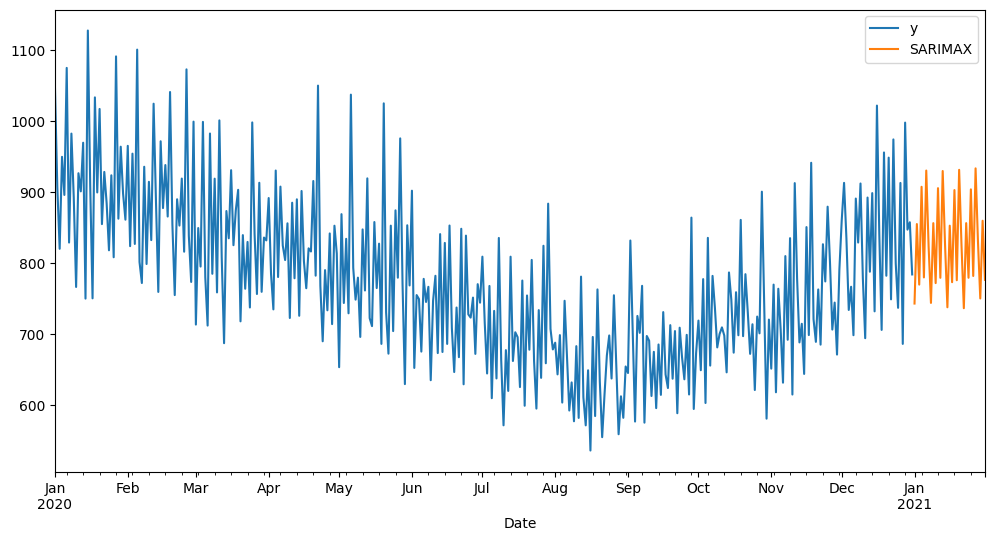

In [36]:
df['y']['2020-01-01':].plot(figsize=(12,6), legend=True)
preds_sarimax.plot(legend=True)

In [37]:
# Exporting
preds_sarimax.to_csv('predictions_sarimax.csv')